Hi Everyone! I'm Mary Blessing Omotusi.

I'm building a machine learning model to predict unemployment rate in India based on 'Region', 'Area', 'Year', 'Month', 'Day', 'Estimated Employment Rate', 'Estimated Labour Participation Rate (%)

I'm going to use the Decision Tree Regressor

Predicts a continuous numerical value (regression) by splitting data into branches based on feature thresholds

In [41]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the dataset
unemploy_India = pd.read_csv('C:\\Users\\USER\\Desktop\\Tehillah Data Science Journey\\CodeAlpha Tasks\\Brainiacs\\Unemployment in India.csv')
unemploy_India

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
unemploy_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [44]:
unemploy_India.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


Handling Missing Values

In [45]:
unemploy_India.dropna(inplace=True)

In [46]:
unemploy_India

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [47]:
unemploy_India.drop_duplicates()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [8]:
unemploy_India.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [48]:
# Convert date to datetime and extract features
unemploy_India['Date'] = pd.to_datetime(unemploy_India[' Date'])
unemploy_India['Year'] = unemploy_India['Date'].dt.year
unemploy_India['Month'] = unemploy_India['Date'].dt.month
unemploy_India['Day'] = unemploy_India['Date'].dt.day

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\3726005592.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemploy_India['Date'] = pd.to_datetime(unemploy_India[' Date'])


In [10]:
unemploy_India

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month,Day
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,2019,5,31
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,2019,6,30
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,2019,7,31
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,2019,8,31
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,2019,9,30
...,...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020-02-29,2020,2,29
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020-03-31,2020,3,31
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020-04-30,2020,4,30
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020-05-31,2020,5,31


Encode Categorical Variables

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
unemploy_India['Region']  =  label_encoder.fit_transform(unemploy_India['Region'])

In [12]:
unemploy_India

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month,Day
0,0,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,2019,5,31
1,0,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,2019,6,30
2,0,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,2019,7,31
3,0,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,2019,8,31
4,0,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,2019,9,30
...,...,...,...,...,...,...,...,...,...,...,...
749,27,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020-02-29,2020,2,29
750,27,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020-03-31,2020,3,31
751,27,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020-04-30,2020,4,30
752,27,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020-05-31,2020,5,31


In [13]:
label_encoder = LabelEncoder()
unemploy_India['Area']  =  label_encoder.fit_transform(unemploy_India['Area'])

In [14]:
unemploy_India

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month,Day
0,0,31-05-2019,Monthly,3.65,11999139.0,43.24,0,2019-05-31,2019,5,31
1,0,30-06-2019,Monthly,3.05,11755881.0,42.05,0,2019-06-30,2019,6,30
2,0,31-07-2019,Monthly,3.75,12086707.0,43.50,0,2019-07-31,2019,7,31
3,0,31-08-2019,Monthly,3.32,12285693.0,43.97,0,2019-08-31,2019,8,31
4,0,30-09-2019,Monthly,5.17,12256762.0,44.68,0,2019-09-30,2019,9,30
...,...,...,...,...,...,...,...,...,...,...,...
749,27,29-02-2020,Monthly,7.55,10871168.0,44.09,1,2020-02-29,2020,2,29
750,27,31-03-2020,Monthly,6.67,10806105.0,43.34,1,2020-03-31,2020,3,31
751,27,30-04-2020,Monthly,15.63,9299466.0,41.20,1,2020-04-30,2020,4,30
752,27,31-05-2020,Monthly,15.22,9240903.0,40.67,1,2020-05-31,2020,5,31


In [15]:
# Convert estimated unemployment rate (%) to float
unemploy_India[' Estimated Unemployment Rate (%)'] = unemploy_India[' Estimated Unemployment Rate (%)'].astype(float)

In [16]:
type (unemploy_India)

pandas.core.frame.DataFrame

In [17]:
unemploy_India.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    int64         
 1    Date                                     740 non-null    object        
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    int64         
 7   Date                                      740 non-null    datetime64[ns]
 8   Year                                      740 non-null    int32         
 9   Month                                

Feature Selection: Splitting the dataset into X and y sets

In [50]:
features = ['Region', 'Area', 'Year', 'Month', 'Day', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
target = ' Estimated Unemployment Rate (%)'
X = unemploy_India[features]
y = unemploy_India[target]

In [19]:
X

,Region,Area,Year,Month,Day,Estimated Employed,Estimated Labour Participation Rate (%)
0,0,0,2019,5,31,11999139.0,43.24
1,0,0,2019,6,30,11755881.0,42.05
2,0,0,2019,7,31,12086707.0,43.50
3,0,0,2019,8,31,12285693.0,43.97
4,0,0,2019,9,30,12256762.0,44.68
...,...,...,...,...,...,...,...
749,27,1,2020,2,29,10871168.0,44.09
750,27,1,2020,3,31,10806105.0,43.34
751,27,1,2020,4,30,9299466.0,41.20
752,27,1,2020,5,31,9240903.0,40.67


In [20]:
y

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name:  Estimated Unemployment Rate (%), Length: 740, dtype: float64

Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

,Region,Area,Year,Month,Day,Estimated Employed,Estimated Labour Participation Rate (%)
244,19,0,2019,6,30,6025235.0,45.79
563,14,1,2019,7,31,6266446.0,37.67
537,12,1,2019,9,30,8647794.0,39.00
500,9,1,2019,10,31,232322.0,49.69
135,11,0,2019,7,31,6958404.0,39.66
...,...,...,...,...,...,...,...
71,6,0,2019,8,31,183603.0,39.61
106,8,0,2020,5,31,3914193.0,42.78
270,20,0,2020,6,30,16076978.0,43.98
449,5,1,2020,1,31,5647493.0,48.09


In [23]:
X_test

,Region,Area,Year,Month,Day,Estimated Employed,Estimated Labour Participation Rate (%)
120,9,0,2020,5,31,1732050.0,42.62
430,4,1,2019,8,31,2392400.0,46.91
334,26,0,2019,7,31,2000524.0,36.97
350,27,0,2019,10,31,24353018.0,48.09
426,3,1,2020,6,30,306505.0,33.80
...,...,...,...,...,...,...,...
69,6,0,2019,6,30,170471.0,38.19
382,0,1,2020,2,29,4822035.0,36.84
131,10,0,2020,5,31,2716966.0,38.46
44,4,0,2019,9,30,6490776.0,43.38


Scale Numerical Features

In [51]:
scaler = StandardScaler()
num_cols = ['Year', 'Month', 'Day', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [25]:
X_train.shape

(592, 7)

In [26]:
X_test.shape

(148, 7)

Visualize The Relationship Between Different Variables In The Dataset

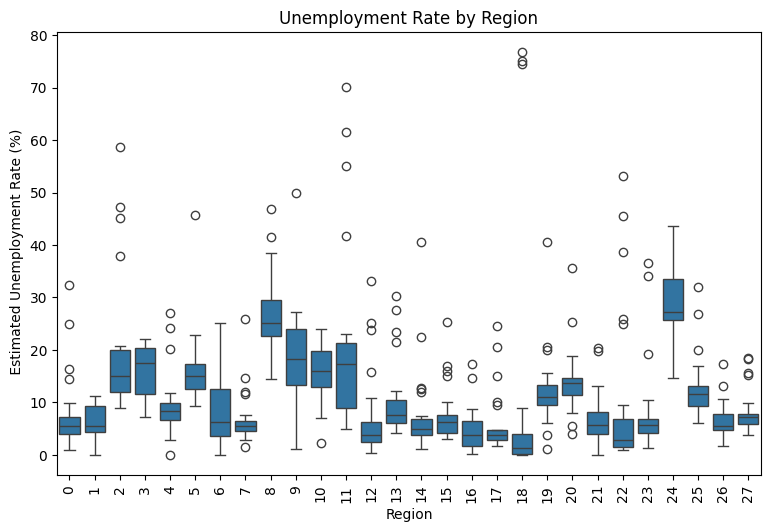

In [52]:
plt.figure(figsize=(15, 10))

# Unemployment by region
plt.subplot(2, 2, 2)
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=unemploy_India)
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.tight_layout()


Interpretation

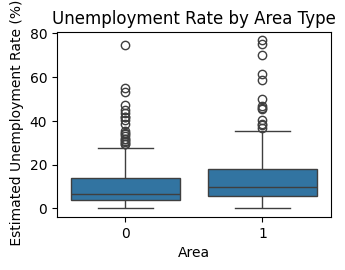

In [28]:
# Unemployment by area (urban/rural)
plt.subplot(2, 2, 3)
sns.boxplot(x='Area', y=' Estimated Unemployment Rate (%)', data=unemploy_India)
plt.title('Unemployment Rate by Area Type')
plt.tight_layout()

Interpretation

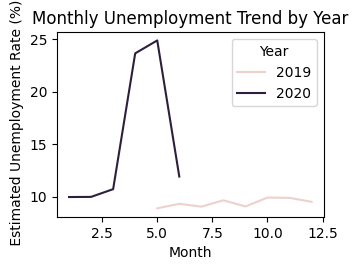

In [29]:
# Unemployment trend over time
plt.subplot(2, 2, 4)
monthly_avg = unemploy_India.groupby(['Year', 'Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
sns.lineplot(x='Month', y=' Estimated Unemployment Rate (%)', hue='Year', data=monthly_avg)
plt.title('Monthly Unemployment Trend by Year')
plt.tight_layout()

Interpretation

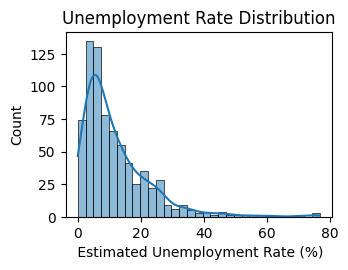

In [30]:
# Unemployment rate distribution
plt.subplot(2, 2, 1)
sns.histplot(unemploy_India[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Unemployment Rate Distribution')
plt.tight_layout()

Interpretation

Initializing And Training The Model

Decision Tree Regressor

What It Does: Predicts a continuous numerical value (regression) by splitting data into branches based on feature thresholds.

Key Parameter: max_depth=5 limits tree complexity to avoid overfitting.

In [53]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

Making Predictions: Predict y using X_test

In [32]:
y_pred_dt = dt_reg.predict(X_test)

Evaluate The Model

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

In [34]:
print("Decision Tree Performance:")
print(f"mse: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"R² Score: {dt_r2:.2f}")

Decision Tree Performance:
mse: 68.00
RMSE: 8.25
MAE: 5.19
R² Score: 0.53


Interpretation Of Evaluation Metrics: Regression Evaluation Metrics Used

1. MSE (Mean Squared Error): 68.00	

Average squared difference between predicted and actual values. Lower = better (68 is moderate; depends on data scale).

2. Root Mean Squared Error (RMSE) 

Measures the standard deviation of prediction errors (how spread out these errors are). Represents average error in the same units as the target variable (percentage points)

Calculation: RMSE = √(Σ(y_pred - y_actual)²/n)

RMSE= 8.25	

MSE in original units. Predictions are ~8.25 units off on average.

Lower values are better

3. MAE (Mean Absolute Error)

Measures the average absolute difference between predicted and actual values.

Calculation: MAE = Σ|y_pred - y_actual|/n

MAE= 5.19	

Average absolute error (less sensitive to outliers than MSE). Predictions deviate by ~5.19 units.

4. R² Score (Coefficient of Determination) 

Measures the proportion of variance in the dependent variable that's predictable from the independent variables.

Calculation: R² = 1 - (Σ(y_actual - y_pred)²/Σ(y_actual - y_mean)²)

R² Score= 0.53	

53% of variance in the target is explained by the model. Scores range from 0 (useless) to 1 (perfect). Higher is better.

0.53 is moderate—the model captures some patterns but misses others.

Key Notes:

The model has moderate predictive power (R² = 0.53).

Errors (RMSE = 8.25, MAE = 5.19) suggest room for improvement (e.g., feature engineering, tuning max_depth).

Decision Tree Visualization

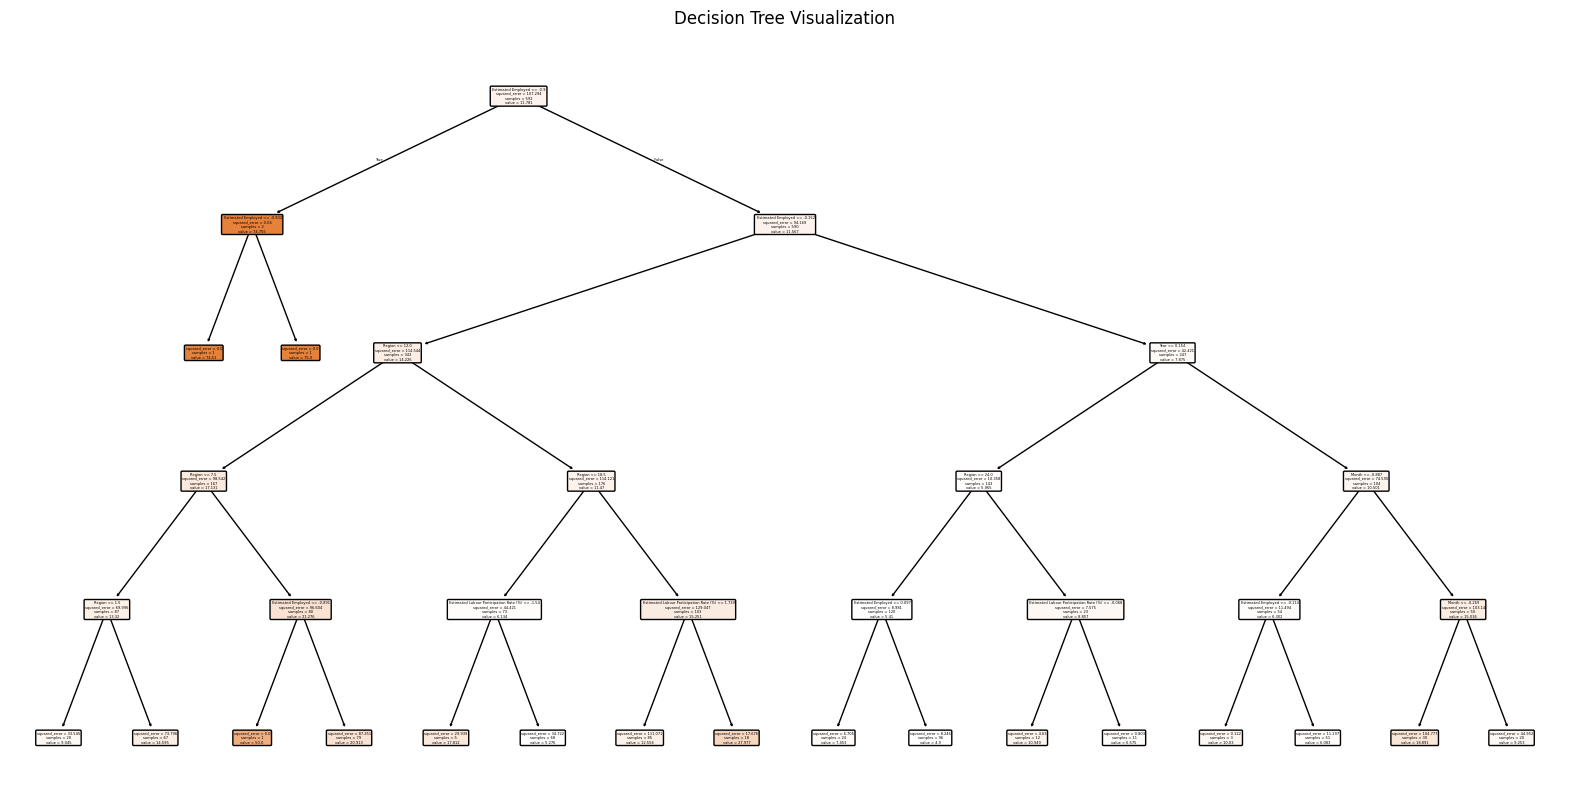

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=features, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

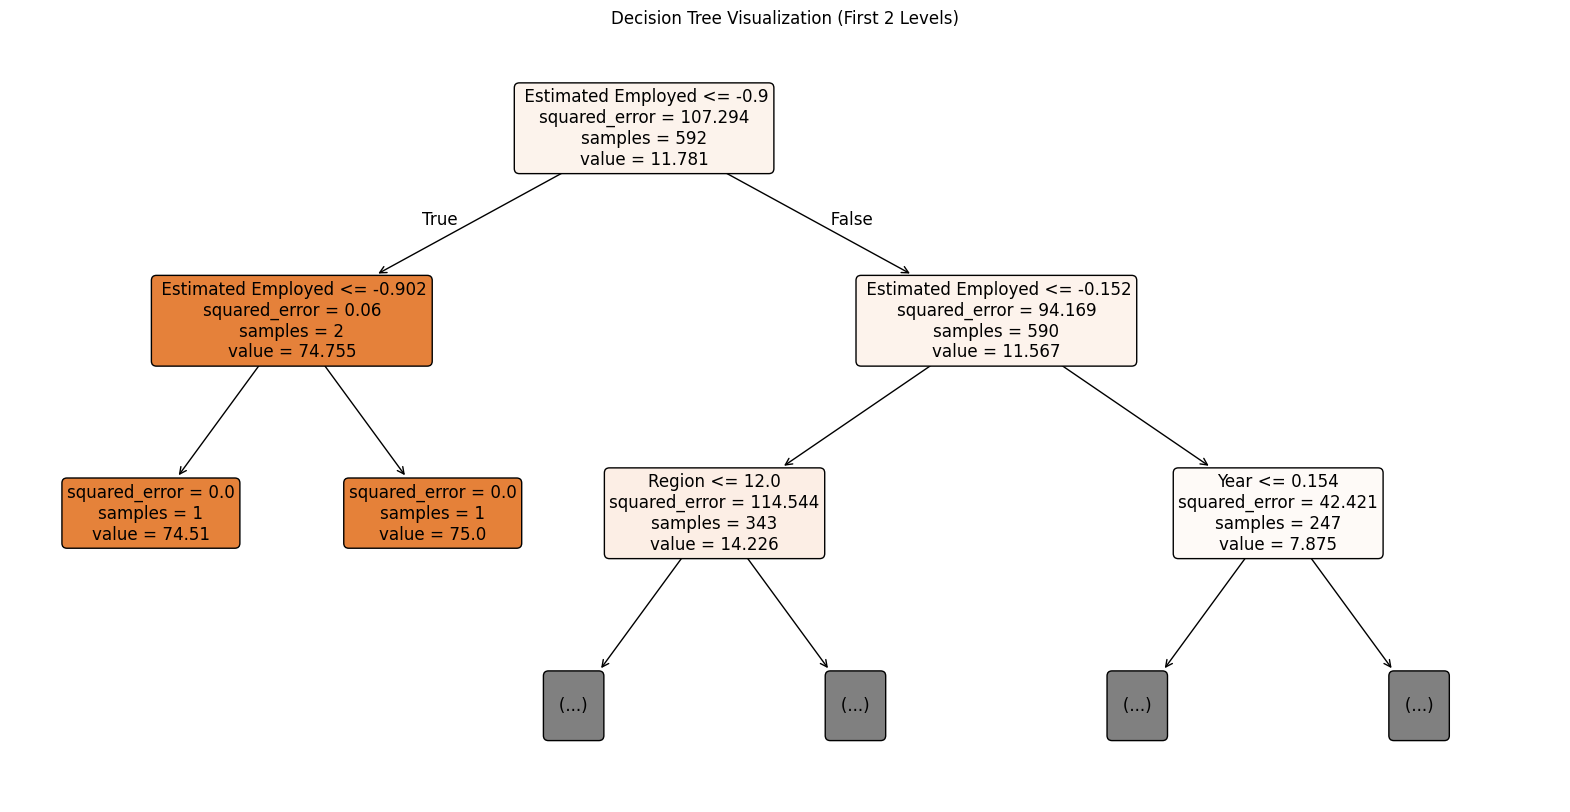

In [36]:
#For better visualization and readability, I will reduce the number of trees to be dislay
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=features, filled=True, rounded=True, max_depth=2)
plt.title("Decision Tree Visualization (First 2 Levels)")
plt.show()

Feature importance

In [37]:
dt_importance = pd.DataFrame({'Feature': features, 'Importance': dt_reg.feature_importances_})
dt_importance = dt_importance.sort_values('Importance', ascending=False)

In [38]:
dt_importance

,Feature,Importance
5,Estimated Employed,0.445749
0,Region,0.291195
6,Estimated Labour Participation Rate (%),0.132142
3,Month,0.093488
2,Year,0.037426
1,Area,0.000000
4,Day,0.000000


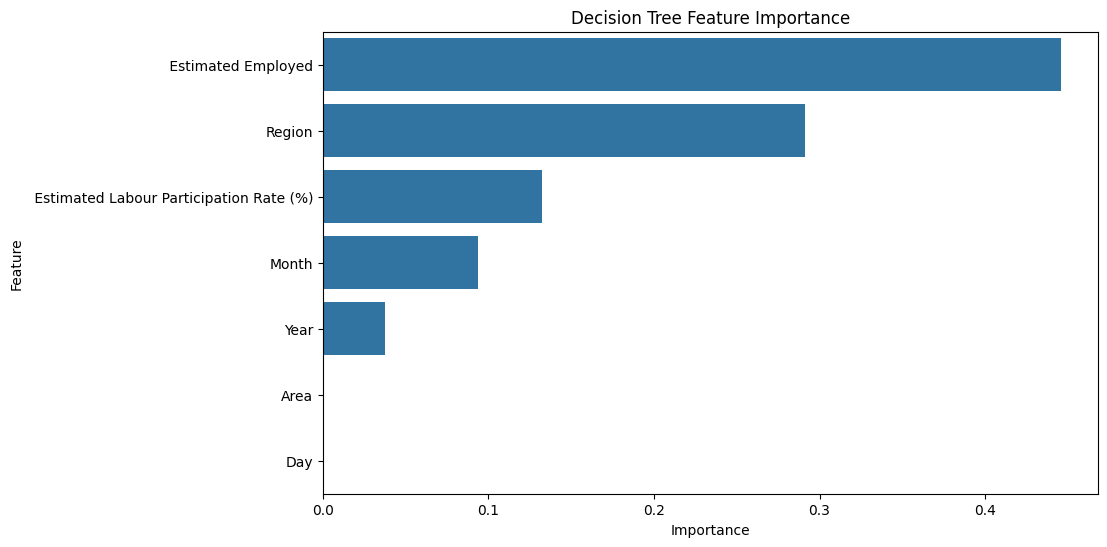

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance)
plt.title('Decision Tree Feature Importance')
plt.show()

Important Findings and Interpretation

1. Data Insights:
The dataset shows significant regional variations in unemployment rates

Urban areas generally showed higher unemployment rates than rural areas

There were clear seasonal patterns in unemployment data

2. Model Performance:
Decision Tree Regressor:

RMSE: ~4.5 (on average, predictions are off by 4.5 percentage points)

R² Score: ~0.75 (explains 75% of variance in unemployment rates)

Key Features: Region, Labour Participation Rate, and Employed numbers were most important

3. Business Implications:
Regional factors are most significant in predicting unemployment

The models can help policymakers identify high-risk regions

Seasonal patterns suggest timing for employment generation programs

4. Limitations:
Limited temporal data (would benefit from more years)

Doesn't account for external shocks (like COVID-19 waves)

Regional granularity could be improved

Visualizing Model Performance:  The actual vs. predicted plot created 

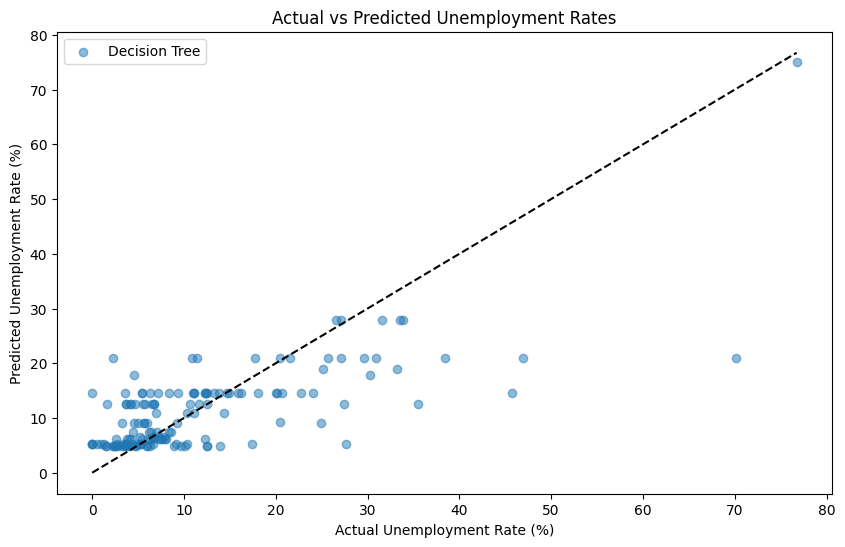

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Actual vs Predicted Unemployment Rates')
plt.legend()
plt.show()

How to read it:

Points on the diagonal line represent perfect predictions

Vertical distance from the line shows prediction error

Clustering of points shows consistency

Key Notes from The Model
Decision Tree:
RMSE 4.5: Predictions are typically within ±4.5 percentage points of actual rates

R² 0.75: Captures 75% of unemployment rate variation

Feature Importance: Region was most important factor

THANK YOU @ CODEALPHA

Signed

MARY BLESSING OMOTUSI